In [24]:
from pygam import LinearGAM, s, f
from datasets import load_happines
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df_train, df_test = load_happines()
df_train.columns

Index(['region', 'economy', 'family', 'health', 'freedom', 'trust',
       'generosity', 'target'],
      dtype='object')

In [26]:
train_X = df_train.drop(['region', 'target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['region', 'target'], axis=1)
test_y = df_test['target']
features = train_X.columns

In [27]:
scaler = StandardScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns=features)
test_X = pd.DataFrame(scaler.transform(test_X), columns=features)

## Spline terms

In [28]:
model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))
model.gridsearch(train_X.values, train_y.values)
model.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.3646
Link Function:                     IdentityLink Log Likelihood:                                  -202.8763
Number of Samples:                          158 AIC:                                              428.4818
                                                AICc:                                             430.4115
                                                GCV:                                                 0.333
                                                Scale:                                              0.2939
                                                Pseudo R-Squared

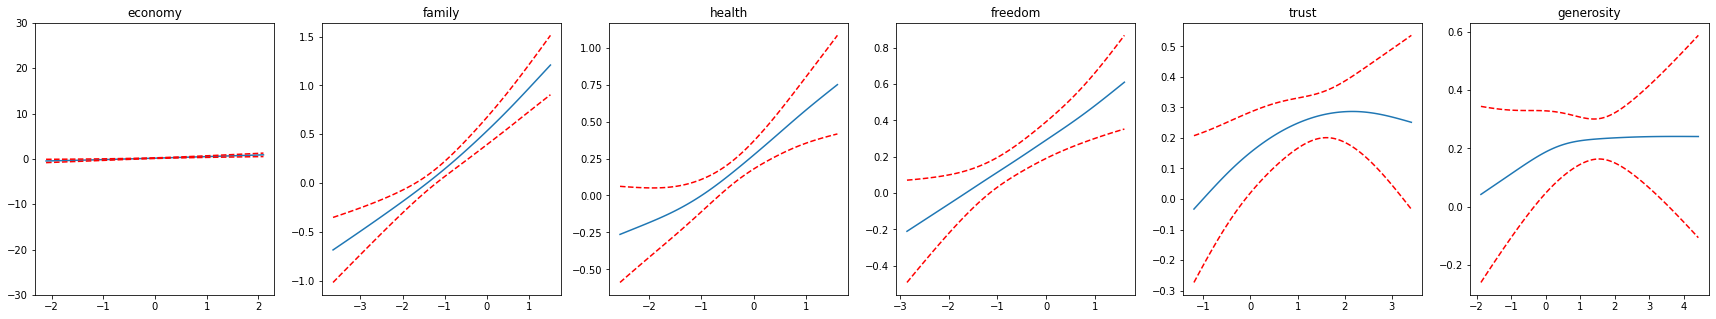

In [29]:
titles = train_X.columns

fig, axs = plt.subplots(1, len(titles), figsize=(30,5))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [34]:
# feature z feature selection
model = LinearGAM(s(0) + s(1) + s(2))
model.gridsearch(train_X[['economy', 'family', 'freedom']].values, train_y.values)
model.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.8715
Link Function:                     IdentityLink Log Likelihood:                                  -202.8921
Number of Samples:                          158 AIC:                                              419.5271
                                                AICc:                                             420.2477
                                                GCV:                                                0.3427
                                                Scale:                                              0.3199
                                                Pseudo R-Squared

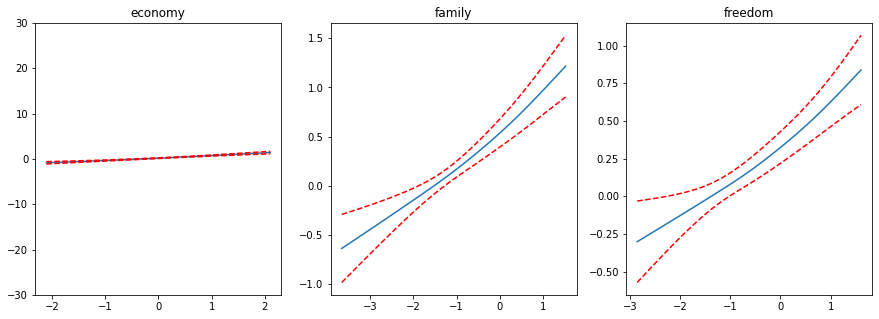

In [35]:
# holding all fixed, economy slightly increase happiness
titles = train_X[['economy', 'family', 'freedom']].columns

fig, axs = plt.subplots(1, len(titles), figsize=(15,5))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])